<a href="https://colab.research.google.com/github/Sadhana1842/AQI-Prediction-STUDY-2/blob/main/SVM_and_LR_with_heatmap_with_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DESCRIPTION:

Performing SVR and Linear regression on the dataset using Cross validation.

Includes selective features based on heatmap.

Outliers were not removed.

Null values were removed.

In [ ]:
import pandas as pd
import io
from google.colab import files
uploaded=files.upload()
df=pd.read_csv(io.BytesIO(uploaded["AQI_DATASET.csv"]))
print(df)

Saving AQI_DATASET.csv to AQI_DATASET.csv
       City        Date   PM2.5    PM10     NO    NO2     NOx     NH3     CO  \
0     Delhi  01-01-2015  313.22  607.98  69.16  36.39  110.59   33.85  15.20   
1     Delhi  02-01-2015  186.18  269.55  62.09  32.87   88.14   31.83   9.54   
2     Delhi  03-01-2015   87.18  131.90  25.73  30.31   47.95   69.55  10.61   
3     Delhi  04-01-2015  151.84  241.84  25.01  36.91   48.62  130.36  11.54   
4     Delhi  05-01-2015  146.60  219.13  14.01  34.92   38.25  122.88   9.20   
...     ...         ...     ...     ...    ...    ...     ...     ...    ...   
2004  Delhi  27-06-2020   39.80  155.94  10.88  21.46   22.47   31.43   0.87   
2005  Delhi  28-06-2020   59.52  308.65  12.67  21.60   23.86   29.27   0.94   
2006  Delhi  29-06-2020   44.86  184.12  10.50  21.57   21.94   27.97   0.88   
2007  Delhi  30-06-2020   39.80   91.98   5.99  17.96   15.44   28.48   0.84   
2008  Delhi  01-07-2020   54.01  128.66   6.33  21.05   16.81   29.06   0.97  

<Axes: >

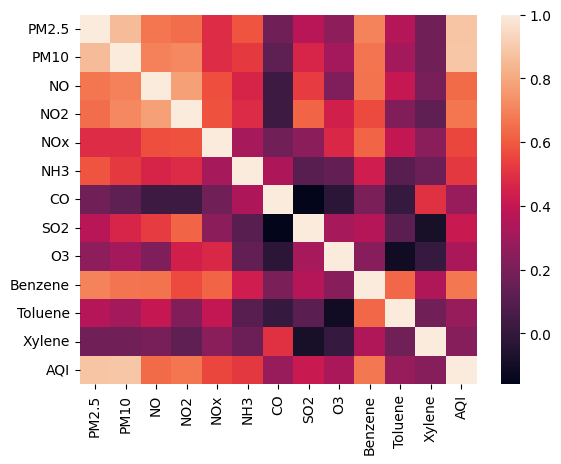

In [ ]:
import seaborn as sns
sns.heatmap(df.corr())

In [ ]:
df=df.drop(['Xylene','Toluene','Benzene','O3','CO','SO2','NO','NOx','NH3','AQI_Bucket','City','Date'], axis=1)
df

,PM2.5,PM10,NO2,AQI
0,313.22,607.98,36.39,472.0
1,186.18,269.55,32.87,454.0
2,87.18,131.90,30.31,143.0
3,151.84,241.84,36.91,319.0
4,146.60,219.13,34.92,325.0
...,...,...,...,...
2004,39.80,155.94,21.46,112.0
2005,59.52,308.65,21.60,196.0
2006,44.86,184.12,21.57,233.0
2007,39.80,91.98,17.96,114.0


In [ ]:
df = df.dropna()

<Axes: >

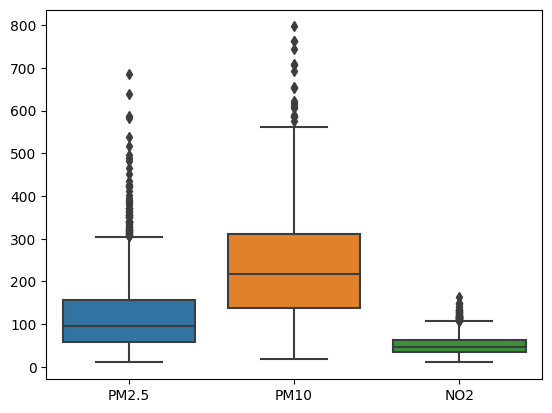

In [ ]:
X= df.drop(['AQI'], axis= 1)
y= df['AQI']
sns.boxplot(data=X)

SVM WITH CV

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=0)
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

In [ ]:
scaled_X_train = Scaler.fit_transform(X_train)
scaled_X_test = Scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.svm import SVR
param_grid = {'C':[0.001,0.01,0.1,0.5,1],
             'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'],
              'degree':[2,3,4],
              'epsilon':[0,0.01,0.1,0.5,1,2]}


from sklearn.model_selection import GridSearchCV
svr = SVR()
grid = GridSearchCV(svr,param_grid=param_grid)
grid.fit(scaled_X_train,y_train)
best_parameters = grid.best_params_
best_accuracy = grid.best_score_

print('Best Parameters after tuning: {}'.format(best_parameters))
print('Best Accuracy after tuning: {}'.format(best_accuracy))

Best Parameters after tuning: {'C': 0.5, 'degree': 2, 'epsilon': 0.5, 'gamma': 'scale', 'kernel': 'linear'}
Best Accuracy after tuning: 0.8410470303047388


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=0)
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
scaled_X_train=Scaler.fit_transform(X_train)
scaled_X_test=Scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02],
                  'subsample'    : [0.9, 0.5],
                  'n_estimators' : [100,500],
                  'max_depth'    : [4,6]
                 }

grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 5, n_jobs=-1)
grid_GBR.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02], 'max_depth': [4, 6],
                         'n_estimators': [100, 500], 'subsample': [0.9, 0.5]})

In [ ]:
print("The best estimator across all serach params: ",grid_GBR.best_estimator_,"\n")
print("The best score across all search params: ",grid_GBR.best_score_,"\n")
print("The best parameters across all searcjed params: ",grid_GBR.best_params_,"\n")

The best estimator across all serach params:  GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=500,
                          subsample=0.5) 

The best score across all search params:  0.8882032715754515 

The best parameters across all searcjed params:  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.5} 



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
parameters = {'copy_X':(True, True),'fit_intercept':(True, False)}
clf3 = GridSearchCV(lin_reg, parameters)
clf3.fit(scaled_X_train, y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'copy_X': (True, True),
                         'fit_intercept': (True, False)})

In [ ]:
print("The best estimator across all serach params: ",clf3.best_estimator_,"\n")
print("The best score across all search params: ",clf3.best_score_,"\n")
print("The best parameters across all searcjed params: ",clf3.best_params_,"\n")

The best estimator across all serach params:  LinearRegression() 

The best score across all search params:  0.8454713697879237 

The best parameters across all searcjed params:  {'copy_X': True, 'fit_intercept': True} 

